In [155]:
# Portfolio Theory
# Reference: http://www.its.caltech.edu/~rosentha/courses/BEM103/Readings/JWCh07.pdf
#            https://www.math.ust.hk/~maykwok/courses/ma362/Topic2.pdf

import numpy as np
import math
import matplotlib.pyplot as plt

In [156]:
returns = np.array([9, 15])
cov = np.array([[529.9, 110.4], [110.4, 1024.0]])

In [167]:
def portfolio_return(w1,w2, r):
    w = np.array([w1,w2])
    return round(np.dot(w,r),2)

def portfolio_risk(w1,w2, c):
    weights_ = np.array([w1,w2])
    transformed_weights = np.dot(c, weights_)
    return round(math.sqrt(np.dot(weights_, transformed_weights)),2)
    
def portfolio_eval(w, r, c):
    ret = round(portfolio_return(w, 1-w, r),2)
    rsk = round(portfolio_risk(w,1-w, c), 2)
    return (ret, rsk)

def mpe(w):
    return portfolio_eval(w, returns, cov)

In [168]:
mpe(0.0)


(15.0, 32.0)

In [169]:
weights = np.linspace(0, 1, 11, endpoint=True)
weights

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [172]:
my_return = np.vectorize(lambda w: portfolio_return(w,1-w, returns))
my_risk = np.vectorize(lambda w: portfolio_risk(w,1-w,cov))

portfolio_returns = my_return(weights)
portfolio_risks =  np.sqrt( my_risk(weights))

print(portfolio_returns)
print(portfolio_risks)

[15.  14.4 13.8 13.2 12.6 12.  11.4 10.8 10.2  9.6  9. ]
[5.65685425 5.4064776  5.16526863 4.94064773 4.74341649 4.58911756
 4.49332839 4.46654229 4.51442134 4.6292548  4.79791621]


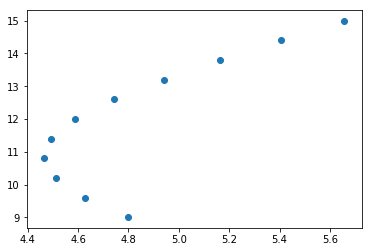

In [173]:
plt.scatter( portfolio_risks, portfolio_returns,)

In [166]:
for w in weights:
    print(round(w,1), mpe(w))

0.0 (15.0, 32.0)
0.1 (14.4, 29.23)
0.2 (13.8, 26.68)
0.3 (13.2, 24.41)
0.4 (12.6, 22.5)
0.5 (12.0, 21.06)
0.6 (11.4, 20.19)
0.7 (10.8, 19.95)
0.8 (10.2, 20.38)
0.9 (9.6, 21.43)
1.0 (9.0, 23.02)


In [ ]:
# NOTICE: w = 0.7, 70% bonds gives better run and less risk than 100% bonds (!!!)